#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





# RAKSHAAN THAREJA 
## U20240120

In [8]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from scipy.spatial import distance 
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
img = cv2.imread("Plaksha_Faculty.jpg")
  
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
text = "Faculty" 
font = cv2.FONT_HERSHEY_SIMPLEX  
font_scale = 0.5  
font_color = (0, 0, 255)  
font_thickness = 2  

for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    cv2.putText(img, text, (x, y - 10), font, font_scale, font_color, font_thickness)
    
cv2.imshow(f"Total number of face(s) detected are {len(faces_rect)}", img)
cv2.imwrite('plot_1.png', img)
cv2.waitKey(5000)
cv2.destroyAllWindows()

2026-02-15 20:47:17.385 python[54006:7613522] +[IMKClient subclass]: chose IMKClient_Modern
2026-02-15 20:47:17.385 python[54006:7613522] +[IMKInputSession subclass]: chose IMKInputSession_Modern


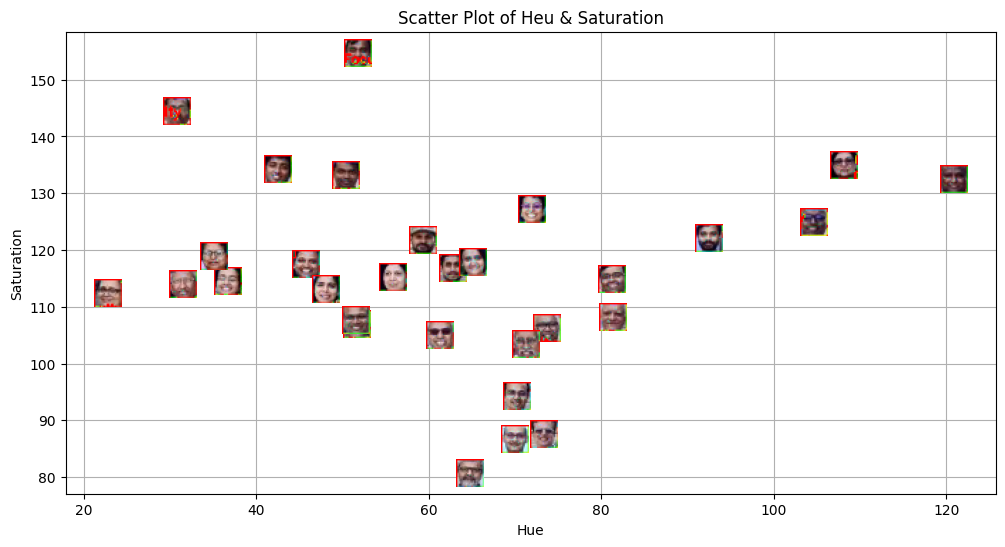

<Figure size 640x480 with 0 Axes>

In [3]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue_saturation = []
face_images = []  

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(hue_saturation)

fig, ax = plt.subplots(figsize=(12, 6))

for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Scatter Plot of Heu & Saturation")
plt.grid(True)

plt.show()
plt.savefig('plot_2.png', dpi = 300)

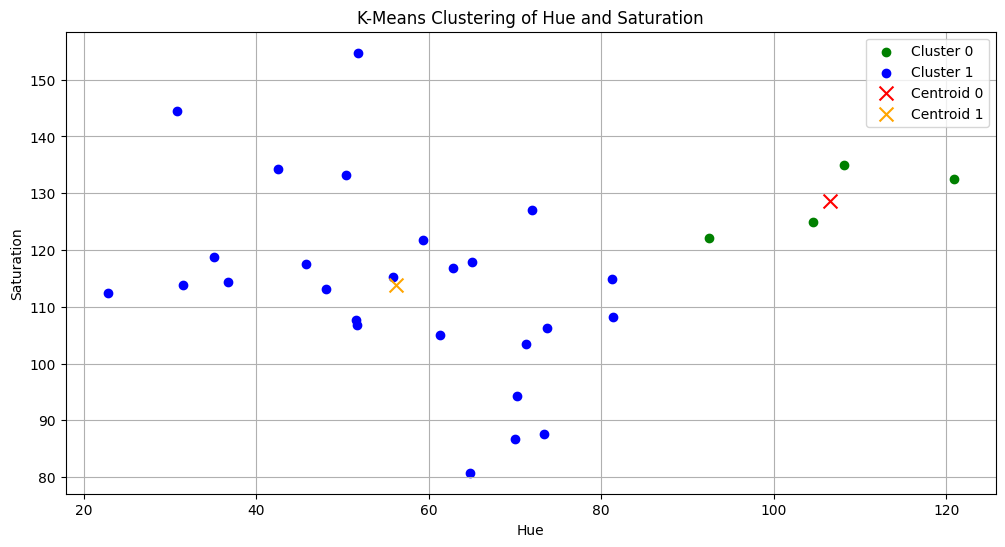

<Figure size 640x480 with 0 Axes>

In [4]:
legend_labels = []

cluster_0_points = []
cluster_1_points = []

fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

plt.scatter(centroid_0[0], centroid_0[1], color='red', marker='x', s=100, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='orange', marker='x', s=100, label='Centroid 1')

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('K-Means Clustering of Hue and Saturation')
plt.legend()
plt.grid(True)
plt.show()

plt.savefig('plot_3.png', dpi = 300)

In [5]:
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg')
gray_template_img = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

template_faces = face_cascade.detectMultiScale(gray_template_img, scaleFactor=1.1, minNeighbors=5)

for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

cv2.imshow("Detected Faces in Template Image", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()    

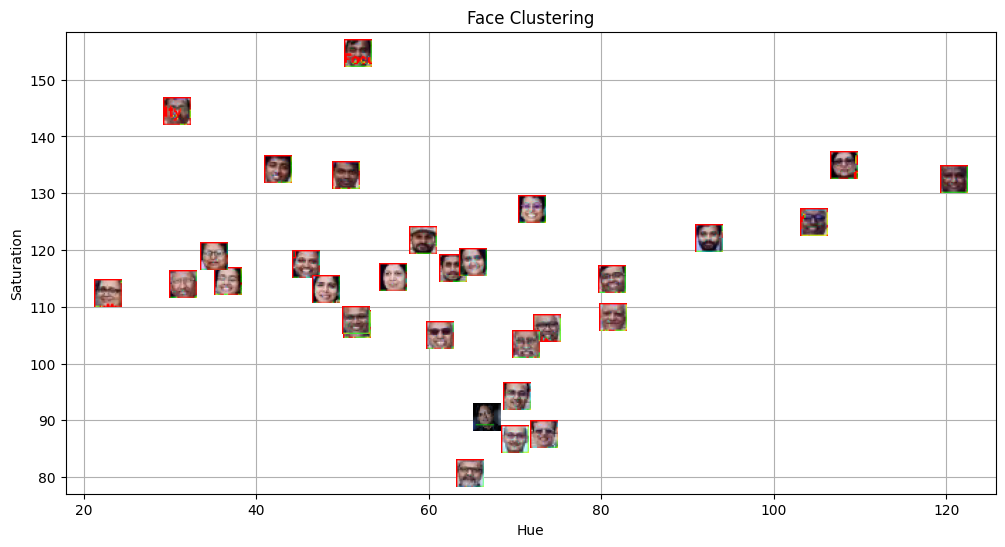

<Figure size 640x480 with 0 Axes>

In [6]:
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

template_label = kmeans.predict([[template_hue, template_saturation]])[0]

fig, ax = plt.subplots(figsize=(12, 6))

for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Face Clustering")
plt.grid(True)
plt.show()
plt.savefig('plot_4.png', dpi = 300)

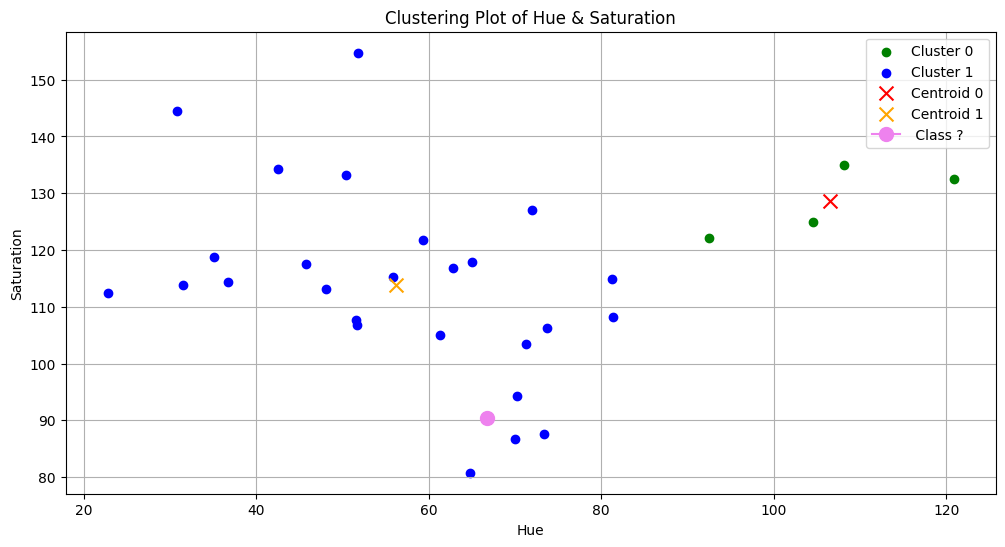

<Figure size 640x480 with 0 Axes>

In [7]:
legend_labels = []

cluster_0_points = []
cluster_1_points = []

fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)
plt.scatter(centroid_0[0], centroid_0[1], color='red', marker='x', s=100, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='orange', marker='x', s=100, label='Centroid 1')
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Clustering Plot of Hue & Saturation")
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('plot_5.png', dpi = 300)

## Report:
## Answer the following questions within your report:


##### 1. What are the common distance metrics used in distance-based classification algorithms?
Distance-based models generally utilize Euclidean (direct straight-line), Manhattan (city-block/grid), or Minkowski (the generalized framework) metrics. In specialized fields like text mining or high-dimensional feature analysis, Cosine Similarity is frequently employed to evaluate the directional alignment of vectors rather than their physical distance in space.

##### 2. What are some real-world applications of distance-based classification algorithms? 
* Content Recommendation: Powering engines that suggest films or music by identifying users with nearly identical preference profiles.

* Medical Diagnostics: Analyzing new patient symptoms against massive historical databases to find similar cases and forecast potential health risks.

* Fraud Prevention: Identifying suspicious credit card activity by measuring how significantly a transaction deviates from a user's established "distance" or behavioral cluster.

##### 3. Explain various distance metrics.
* Euclidean Distance: Often described as the "as the crow flies" measurement, it calculates the shortest physical path between two points in space. It is the most common choice for continuous, numerical data.

    $$d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$
* Manhattan Distance: Also known as Taxicab distance, it sums the absolute differences of coordinates. This is often more robust than Euclidean distance when dealing with datasets that contain extreme outliers.
    $$d(x, y) = \sum_{i=1}^{n} |x_i - y_i|$$
* Hamming Distance: Primarily used for string comparison or categorical data, this metric simply counts the number of positions where the corresponding elements or bits differ.

##### 4. What is the role of cross validation in model performance? 
Cross-validation, such as the K-Fold method, serves as a vital "reliability check" for a model's predictive power. By rotating the training and testing sets through multiple iterations and averaging the results, it ensures the model generalizes well to new data rather than simply overfitting to the specific noise of a single training split.

##### 5. Explain variance and bias in terms of KNN? 
In the KNN algorithm, the trade-off between bias and variance is directly dictated by the value of K:

* Low K (e.g., K=1): Results in High Variance and Low Bias. The decision boundary is highly complex and "jittery," following every data point too closely (Overfitting).

* High K (e.g., K=20): Results in Low Variance and High Bias. The decision boundary becomes overly simplified and "smooth," potentially ignoring significant local trends (Underfitting).